# Intro to Pandas

This is a short introduction to pandas based on the [10 Minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html) geared mainly for new users along with a few addition based on the [Cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook) recipes

Customarily, we import as follows:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Object Creation

See the [Data Structure Intro section](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro) 

### Series
Creating a Series by passing a list of values, letting pandas create a default integer index:

In [3]:
s = pd.Series([1,3,5,np.nan,6,8])

Series is very similar to numpy array but the index of a series is an additional class attribute

In [5]:
s.values # values of the series - a numpy arry

array([ 1.,  3.,  5., nan,  6.,  8.])

In [6]:
s.index # index of the series

RangeIndex(start=0, stop=6, step=1)

### Dataframes

Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns:

In [7]:
dates = pd.date_range('20130101', periods=6)

In [8]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

A Dataframe has:
    - index
    - values
    - column names
    - is a generalization of an excel table

In [9]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [11]:
df.head()

,A,B,C,D
2013-01-01,0.056573,0.159333,-0.054955,-0.826575
2013-01-02,-0.480141,-1.137506,0.237669,1.733485
2013-01-03,1.099803,-3.386872,0.398490,1.205075
2013-01-04,0.930561,0.208805,-1.104176,0.423279
2013-01-05,-0.078533,-0.955805,0.364663,0.854699


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [12]:
df2 = pd.DataFrame({'A':1.,
                   'B':pd.Timestamp('20130102'),
                   'C':pd.Series(1,index=list(range(4)),dtype='float32'),
                   'D':np.array([3]*4,dtype='int32'),
                   'E':pd.Categorical(["test","train","test","train"]),
                   'F':'foo'})

In [13]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Having specific [dtypes](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes)

In [14]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing Data

See the [Basics section](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics) 

See the top & bottom rows of the frame

In [15]:
df.head(2)

,A,B,C,D
2013-01-01,0.056573,0.159333,-0.054955,-0.826575
2013-01-02,-0.480141,-1.137506,0.237669,1.733485


In [16]:
df.tail(2)

,A,B,C,D
2013-01-05,-0.078533,-0.955805,0.364663,0.854699
2013-01-06,-1.411446,-1.788692,1.133534,-0.126493


Display the index, columns, and the underlying numpy data

In [17]:
df.reset_index().set_index('A').sort_index()

,index,B,C,D
A,,,,
-1.411446,2013-01-06,-1.788692,1.133534,-0.126493
-0.480141,2013-01-02,-1.137506,0.237669,1.733485
-0.078533,2013-01-05,-0.955805,0.364663,0.854699
0.056573,2013-01-01,0.159333,-0.054955,-0.826575
0.930561,2013-01-04,0.208805,-1.104176,0.423279
1.099803,2013-01-03,-3.386872,0.398490,1.205075


In [18]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [19]:
df.values # returns a numpy array

array([[ 0.05657336,  0.1593327 , -0.05495525, -0.82657504],
       [-0.48014086, -1.13750637,  0.23766922,  1.73348476],
       [ 1.09980257, -3.38687165,  0.39848999,  1.2050749 ],
       [ 0.93056107,  0.20880502, -1.10417636,  0.42327943],
       [-0.07853279, -0.95580454,  0.3646634 ,  0.85469944],
       [-1.41144632, -1.78869246,  1.13353423, -0.12649259]])

Describe shows a quick statistic summary of the numeric columns of the data

In [20]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.019470,-1.150123,0.162538,0.543912
std,0.927935,1.342393,0.734422,0.926395
min,-1.411446,-3.386872,-1.104176,-0.826575
25%,-0.379739,-1.625896,0.018201,0.010950
50%,-0.010980,-1.046655,0.301166,0.638989
75%,0.712064,-0.119452,0.390033,1.117481
max,1.099803,0.208805,1.133534,1.733485


Transposing your data

In [21]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.056573,-0.480141,1.099803,0.930561,-0.078533,-1.411446
B,0.159333,-1.137506,-3.386872,0.208805,-0.955805,-1.788692
C,-0.054955,0.237669,0.398490,-1.104176,0.364663,1.133534
D,-0.826575,1.733485,1.205075,0.423279,0.854699,-0.126493


Sorting by an axis

In [22]:
df.reset_index().rename(columns={'index':'date'}).set_index(['date', 'A']).sort_index(axis=0, ascending=True)

,,B,C,D
date,A,,,
2013-01-01,0.056573,0.159333,-0.054955,-0.826575
2013-01-02,-0.480141,-1.137506,0.237669,1.733485
2013-01-03,1.099803,-3.386872,0.398490,1.205075
2013-01-04,0.930561,0.208805,-1.104176,0.423279
2013-01-05,-0.078533,-0.955805,0.364663,0.854699
2013-01-06,-1.411446,-1.788692,1.133534,-0.126493


In [23]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.826575,-0.054955,0.159333,0.056573
2013-01-02,1.733485,0.237669,-1.137506,-0.480141
2013-01-03,1.205075,0.398490,-3.386872,1.099803
2013-01-04,0.423279,-1.104176,0.208805,0.930561
2013-01-05,0.854699,0.364663,-0.955805,-0.078533
2013-01-06,-0.126493,1.133534,-1.788692,-1.411446


Sorting by value

In [24]:
df.sort_values(by='B', ascending=False)

,A,B,C,D
2013-01-04,0.930561,0.208805,-1.104176,0.423279
2013-01-01,0.056573,0.159333,-0.054955,-0.826575
2013-01-05,-0.078533,-0.955805,0.364663,0.854699
2013-01-02,-0.480141,-1.137506,0.237669,1.733485
2013-01-06,-1.411446,-1.788692,1.133534,-0.126493
2013-01-03,1.099803,-3.386872,0.398490,1.205075


## Selection

**Note:** While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc, .iloc and .ix.

See the indexing documentation [Indexing and Selecting Data](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) and [MultiIndex / Advanced Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced)

### Getting

Selecting a single column, which yields a Series, equivalent to df.A

In [25]:
df

,A,B,C,D
2013-01-01,0.056573,0.159333,-0.054955,-0.826575
2013-01-02,-0.480141,-1.137506,0.237669,1.733485
2013-01-03,1.099803,-3.386872,0.398490,1.205075
2013-01-04,0.930561,0.208805,-1.104176,0.423279
2013-01-05,-0.078533,-0.955805,0.364663,0.854699
2013-01-06,-1.411446,-1.788692,1.133534,-0.126493


In [26]:
df['A']

2013-01-01    0.056573
2013-01-02   -0.480141
2013-01-03    1.099803
2013-01-04    0.930561
2013-01-05   -0.078533
2013-01-06   -1.411446
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.

In [27]:
df[0:3]

,A,B,C,D
2013-01-01,0.056573,0.159333,-0.054955,-0.826575
2013-01-02,-0.480141,-1.137506,0.237669,1.733485
2013-01-03,1.099803,-3.386872,0.398490,1.205075


In [28]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.480141,-1.137506,0.237669,1.733485
2013-01-03,1.099803,-3.386872,0.398490,1.205075
2013-01-04,0.930561,0.208805,-1.104176,0.423279


### Selection by Label

See more in [Selection by Label](Selection by Label)

For getting a cross section using a label

In [30]:
df.loc[dates[0]]

A    0.056573
B    0.159333
C   -0.054955
D   -0.826575
Name: 2013-01-01 00:00:00, dtype: float64

Selection by Label

In [31]:
df.loc[:,['A','B']] # select all rows and column A, B

,A,B
2013-01-01,0.056573,0.159333
2013-01-02,-0.480141,-1.137506
2013-01-03,1.099803,-3.386872
2013-01-04,0.930561,0.208805
2013-01-05,-0.078533,-0.955805
2013-01-06,-1.411446,-1.788692


Showing label slicing, both endpoints are included

In [32]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-0.480141,-1.137506
2013-01-03,1.099803,-3.386872
2013-01-04,0.930561,0.208805


Reduction in the dimensions of the returned object

In [33]:
df.loc['20130102',['A','B']] = 1

For getting a scalar value

In [34]:
df.loc[dates[0],'A']

0.056573358267329496

### Selection by Position

See more in [Selection by Position](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer)

Select via the position of the passed integers

In [37]:
df.iloc[3]

A    0.930561
B    0.208805
C   -1.104176
D    0.423279
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python

In [38]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.930561,0.208805
2013-01-05,-0.078533,-0.955805


By lists of integer position locations, similar to the numpy/python style

In [39]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,1.000000,0.237669
2013-01-03,1.099803,0.398490
2013-01-05,-0.078533,0.364663


For slicing rows explicitly

In [40]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,1.000000,1.000000,0.237669,1.733485
2013-01-03,1.099803,-3.386872,0.398490,1.205075


For slicing columns explicitly

In [41]:
df.iloc[:,1:3]

,B,C
2013-01-01,0.159333,-0.054955
2013-01-02,1.000000,0.237669
2013-01-03,-3.386872,0.398490
2013-01-04,0.208805,-1.104176
2013-01-05,-0.955805,0.364663
2013-01-06,-1.788692,1.133534


For getting a value explicitly

In [42]:
df.iloc[1,1]

1.0

For getting fast access to a scalar (equiv to the prior method)

In [43]:
df.iat[1,1]

1.0

## Boolean Indexing

Using a single column’s values to select data.

In [49]:
df[df.B > 0]

,A,B,C,D
2013-01-01,0.056573,0.159333,-0.054955,-0.826575
2013-01-02,1.000000,1.000000,0.237669,1.733485
2013-01-04,0.930561,0.208805,-1.104176,0.423279


A where operation for getting.

In [50]:
df[df > 0]

,A,B,C,D
2013-01-01,0.056573,0.159333,NaN,NaN
2013-01-02,1.000000,1.000000,0.237669,1.733485
2013-01-03,1.099803,NaN,0.398490,1.205075
2013-01-04,0.930561,0.208805,NaN,0.423279
2013-01-05,NaN,NaN,0.364663,0.854699
2013-01-06,NaN,NaN,1.133534,NaN


Using the isin() method for filtering:

In [51]:
df2 = df.copy()

In [52]:
df2['E'] = ['one','one', 'two','three','four','three']

In [53]:
df2

,A,B,C,D,E
2013-01-01,0.056573,0.159333,-0.054955,-0.826575,one
2013-01-02,1.000000,1.000000,0.237669,1.733485,one
2013-01-03,1.099803,-3.386872,0.398490,1.205075,two
2013-01-04,0.930561,0.208805,-1.104176,0.423279,three
2013-01-05,-0.078533,-0.955805,0.364663,0.854699,four
2013-01-06,-1.411446,-1.788692,1.133534,-0.126493,three


In [54]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,1.099803,-3.386872,0.398490,1.205075,two
2013-01-05,-0.078533,-0.955805,0.364663,0.854699,four


## Setting

Setting a new column automatically aligns the data by the indexes

In [55]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102',periods=6))

In [56]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [57]:
df['F'] = s1

Setting values by label

In [58]:
df.at[dates[0],'A'] = 0

Settomg values by position

In [59]:
df.iat[0,1] = 0

Setting by assigning with a numpy array

In [60]:
df.loc[:,'D'] = np.array([5] * len(df))

The result of the prior setting operations

In [61]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.054955,5,NaN
2013-01-02,1.000000,1.000000,0.237669,5,1.0
2013-01-03,1.099803,-3.386872,0.398490,5,2.0
2013-01-04,0.930561,0.208805,-1.104176,5,3.0
2013-01-05,-0.078533,-0.955805,0.364663,5,4.0
2013-01-06,-1.411446,-1.788692,1.133534,5,5.0


A where operation with setting.

In [62]:
df2 = df.copy()

In [63]:
df2[df2 > 0] = -df2

In [64]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.054955,-5,NaN
2013-01-02,-1.000000,-1.000000,-0.237669,-5,-1.0
2013-01-03,-1.099803,-3.386872,-0.398490,-5,-2.0
2013-01-04,-0.930561,-0.208805,-1.104176,-5,-3.0
2013-01-05,-0.078533,-0.955805,-0.364663,-5,-4.0
2013-01-06,-1.411446,-1.788692,-1.133534,-5,-5.0


## Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [65]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [66]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [67]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.054955,5,NaN,1.0
2013-01-02,1.000000,1.000000,0.237669,5,1.0,1.0
2013-01-03,1.099803,-3.386872,0.398490,5,2.0,NaN
2013-01-04,0.930561,0.208805,-1.104176,5,3.0,NaN


To drop any rows that have missing data.

In [68]:
df1.dropna(how='all', axis=1)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.054955,5,NaN,1.0
2013-01-02,1.000000,1.000000,0.237669,5,1.0,1.0
2013-01-03,1.099803,-3.386872,0.398490,5,2.0,NaN
2013-01-04,0.930561,0.208805,-1.104176,5,3.0,NaN


Filling missing data

In [69]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.054955,5,5.0,1.0
2013-01-02,1.000000,1.000000,0.237669,5,1.0,1.0
2013-01-03,1.099803,-3.386872,0.398490,5,2.0,5.0
2013-01-04,0.930561,0.208805,-1.104176,5,3.0,5.0


To get the boolean mask where values are nan

In [70]:
pd.isnull(df1).sum()

A    0
B    0
C    0
D    0
F    1
E    2
dtype: int64

## Operations

See the [Basic section on Binary Ops](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop)

### Stats

Operations in general exclude missing data.

Performing a descriptive statistic

In [72]:
df.max()

A    1.099803
B    1.000000
C    1.133534
D    5.000000
F    5.000000
dtype: float64

Same operation on the other axis

In [73]:
df.mean(1)

2013-01-01    1.236261
2013-01-02    1.647534
2013-01-03    1.022284
2013-01-04    1.607038
2013-01-05    1.666065
2013-01-06    1.586679
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [74]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates)#.shift(2)

In [76]:
df.subtract(s, axis='index')

,A,B,C,D,F
2013-01-01,-1.000000,-1.000000,-1.054955,4.0,NaN
2013-01-02,-2.000000,-2.000000,-2.762331,2.0,-2.0
2013-01-03,-3.900197,-8.386872,-4.601510,0.0,-3.0
2013-01-04,NaN,NaN,NaN,NaN,NaN
2013-01-05,-6.078533,-6.955805,-5.635337,-1.0,-2.0
2013-01-06,-9.411446,-9.788692,-6.866466,-3.0,-3.0


In [77]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,-1.000000,-1.000000,-1.054955,4.0,NaN
2013-01-02,-2.000000,-2.000000,-2.762331,2.0,-2.0
2013-01-03,-3.900197,-8.386872,-4.601510,0.0,-3.0
2013-01-04,NaN,NaN,NaN,NaN,NaN
2013-01-05,-6.078533,-6.955805,-5.635337,-1.0,-2.0
2013-01-06,-9.411446,-9.788692,-6.866466,-3.0,-3.0


### Apply

Applying functions to the data

In [79]:
df.cumsum() # very useful for computing total returns

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.054955,5,NaN
2013-01-02,1.000000,1.000000,0.182714,10,1.0
2013-01-03,2.099803,-2.386872,0.581204,15,3.0
2013-01-04,3.030364,-2.178067,-0.522972,20,6.0
2013-01-05,2.951831,-3.133871,-0.158309,25,10.0
2013-01-06,1.540385,-4.922564,0.975225,30,15.0


In [80]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.054955,5,NaN
2013-01-02,1.000000,1.000000,0.182714,10,1.0
2013-01-03,2.099803,-2.386872,0.581204,15,3.0
2013-01-04,3.030364,-2.178067,-0.522972,20,6.0
2013-01-05,2.951831,-3.133871,-0.158309,25,10.0
2013-01-06,1.540385,-4.922564,0.975225,30,15.0


In [81]:
df.apply(lambda x: x.max() - x.min())

A    2.511249
B    4.386872
C    2.237711
D    0.000000
F    4.000000
dtype: float64

### Histogramming

See more at [Histogramming and Discretization](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)

In [82]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [83]:
s

0    6
1    5
2    1
3    3
4    1
5    4
6    0
7    0
8    2
9    4
dtype: int64

In [84]:
s.value_counts()

0    2
1    2
4    2
2    1
3    1
5    1
6    1
dtype: int64

### String Methods

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses [regular expressions](https://docs.python.org/2/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods).

In [85]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [86]:
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [87]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging)

Concatenating pandas objects together with concat():

In [88]:
df = pd.DataFrame(np.random.randn(10, 4))

In [89]:
df

,0,1,2,3
0,1.017096,0.583143,-0.029578,0.420775
1,-1.378194,0.443747,-1.056649,0.267996
2,0.675636,0.288908,-2.114351,-1.957281
3,-1.494339,1.622556,0.426388,-1.876453
4,1.348882,1.556022,-0.490135,-1.438133
5,-1.830610,-1.503397,0.498304,1.038869
6,0.246876,-2.175457,1.623862,-0.734835
7,-0.237010,0.462616,-0.694109,0.914963
8,0.961374,0.845112,2.062728,2.151655
9,0.324078,-0.582325,0.225703,-1.164569


In [90]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  1.017096  0.583143 -0.029578  0.420775
 1 -1.378194  0.443747 -1.056649  0.267996
 2  0.675636  0.288908 -2.114351 -1.957281,
           0         1         2         3
 3 -1.494339  1.622556  0.426388 -1.876453
 4  1.348882  1.556022 -0.490135 -1.438133
 5 -1.830610 -1.503397  0.498304  1.038869
 6  0.246876 -2.175457  1.623862 -0.734835,
           0         1         2         3
 7 -0.237010  0.462616 -0.694109  0.914963
 8  0.961374  0.845112  2.062728  2.151655
 9  0.324078 -0.582325  0.225703 -1.164569]

In [91]:
pd.concat(pieces)

,0,1,2,3
0,1.017096,0.583143,-0.029578,0.420775
1,-1.378194,0.443747,-1.056649,0.267996
2,0.675636,0.288908,-2.114351,-1.957281
3,-1.494339,1.622556,0.426388,-1.876453
4,1.348882,1.556022,-0.490135,-1.438133
5,-1.830610,-1.503397,0.498304,1.038869
6,0.246876,-2.175457,1.623862,-0.734835
7,-0.237010,0.462616,-0.694109,0.914963
8,0.961374,0.845112,2.062728,2.151655
9,0.324078,-0.582325,0.225703,-1.164569


### Join

SQL style merges. See the [Database style joining](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join)

In [92]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [93]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [94]:
left

,key,lval
0,foo,1
1,foo,2


In [95]:
right

,key,rval
0,foo,4
1,foo,5


In [96]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Append

Append rows to a dataframe. See the [Appending](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation)

In [97]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [98]:
df

,A,B,C,D
0,-1.018943,0.830798,0.445858,0.779527
1,-1.048213,0.187973,0.746063,-0.323631
2,0.278128,0.237679,-0.135153,0.467364
3,-0.004610,0.476545,-0.639898,0.803674
4,-1.814833,-1.970398,-1.064308,0.609056
5,-0.672401,1.974566,1.390401,1.254933
6,-1.041315,-0.098163,-1.793583,0.626114
7,-0.982286,-0.001413,-1.222559,-0.837308


In [99]:
s = df.iloc[3]
s

A   -0.004610
B    0.476545
C   -0.639898
D    0.803674
Name: 3, dtype: float64

In [100]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-1.018943,0.830798,0.445858,0.779527
1,-1.048213,0.187973,0.746063,-0.323631
2,0.278128,0.237679,-0.135153,0.467364
3,-0.004610,0.476545,-0.639898,0.803674
4,-1.814833,-1.970398,-1.064308,0.609056
5,-0.672401,1.974566,1.390401,1.254933
6,-1.041315,-0.098163,-1.793583,0.626114
7,-0.982286,-0.001413,-1.222559,-0.837308
8,-0.004610,0.476545,-0.639898,0.803674


## Grouping

By “group by” we are referring to a process involving one or more of the following steps

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

See the [Grouping section](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)

In [101]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                                    'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                                    'C' : np.random.randn(8),
                                     'D' : np.random.randn(8)})

In [102]:
df.set_index(['A', 'B']).sort_index()

C         D
A   B                        
bar one   -0.464087 -1.485496
    three -0.971813  0.645862
    two    0.497716  2.246094
foo one    0.704297  0.578579
    one    0.567852 -0.004890
    three -2.437398 -0.067146
    two    1.418824 -1.359379
    two    0.029065 -1.510072

Grouping and then applying a function sum to the resulting groups.

In [103]:
df.groupby(['A', 'B']).max()

C         D
A   B                        
bar one   -0.464087 -1.485496
    three -0.971813  0.645862
    two    0.497716  2.246094
foo one    0.704297  0.578579
    three -2.437398 -0.067146
    two    1.418824 -1.359379

In [104]:
df.groupby('A').sum()

,C,D
A,,
bar,-0.938185,1.406460
foo,0.282639,-2.362907


In [105]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.464087 -1.485496
    three -0.971813  0.645862
    two    0.497716  2.246094
foo one    1.272149  0.573690
    three -2.437398 -0.067146
    two    1.447889 -2.869450

In [106]:
df.set_index(['A', 'B']).sort_index()

C         D
A   B                        
bar one   -0.464087 -1.485496
    three -0.971813  0.645862
    two    0.497716  2.246094
foo one    0.704297  0.578579
    one    0.567852 -0.004890
    three -2.437398 -0.067146
    two    1.418824 -1.359379
    two    0.029065 -1.510072

In [107]:
df.groupby(['A', 'B']).describe()

C                                                              \
          count      mean       std       min       25%       50%       75%   
A   B                                                                         
bar one     1.0 -0.464087       NaN -0.464087 -0.464087 -0.464087 -0.464087   
    three   1.0 -0.971813       NaN -0.971813 -0.971813 -0.971813 -0.971813   
    two     1.0  0.497716       NaN  0.497716  0.497716  0.497716  0.497716   
foo one     2.0  0.636074  0.096481  0.567852  0.601963  0.636074  0.670186   
    three   1.0 -2.437398       NaN -2.437398 -2.437398 -2.437398 -2.437398   
    two     2.0  0.723944  0.982708  0.029065  0.376505  0.723944  1.071384   

                        D                                                    \
                max count      mean       std       min       25%       50%   
A   B                                                                         
bar one   -0.464087   1.0 -1.485496       NaN -1.485496 -1.485496 -1.485496   
    three -0.971813   1.0  0.645862       NaN  0.645862  0.645862  0.645862   
    two    0.497716   1.0  2.246094       NaN  2.246094  2.246094  2.246094   
foo one    0.704297   2.0  0.286845  0.412575 -0.004890  0.140978  0.286845   
    three -2.437398   1.0 -0.067146       NaN -0.067146 -0.067146 -0.067146   
    two    1.418824   2.0 -1.434725  0.106556 -1.510072 -1.472399 -1.434725   

                               
                75%       max  
A   B                          
bar one   -1.485496 -1.485496  
    three  0.645862  0.645862  
    two    2.246094  2.246094  
foo one    0.432712  0.578579  
    three -0.067146 -0.067146  
    two   -1.397052 -1.359379

### Pivot Tables

See the section on [Pivot Tables](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-pivot).

In [115]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                                    'B' : ['A', 'B', 'C'] * 4,
                                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                                    'D' : np.random.randn(12),
                                    'E' : np.random.randn(12)})

In [116]:
df

,A,B,C,D,E
0,one,A,foo,-0.137884,-0.216885
1,one,B,foo,0.440509,0.560528
2,two,C,foo,0.574434,0.242231
3,three,A,bar,0.418830,0.376244
4,one,B,bar,-0.201552,-0.109787
5,one,C,bar,1.500469,-0.669567
6,two,A,foo,-2.094960,-0.861628
7,three,B,foo,-1.236805,1.951345
8,one,C,foo,-0.128313,0.729287
9,one,A,bar,0.021624,-0.664850


We can produce pivot tables from this data very easily:

In [117]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.021624 -0.137884
      B -0.201552  0.440509
      C  1.500469 -0.128313
three A  0.418830       NaN
      B       NaN -1.236805
      C -0.017477       NaN
two   A       NaN -2.094960
      B -0.094207       NaN
      C       NaN  0.574434

## Time Series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series section](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries)

In [120]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
rng[:5]

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04'],
              dtype='datetime64[ns]', freq='S')

In [121]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts[:5]

2012-01-01 00:00:00    127
2012-01-01 00:00:01     19
2012-01-01 00:00:02    347
2012-01-01 00:00:03     42
2012-01-01 00:00:04     20
Freq: S, dtype: int64

In [123]:
ts.resample('1Min').sum()

2012-01-01 00:00:00    14711
2012-01-01 00:01:00     9784
Freq: T, dtype: int64

Time zone representation

In [ ]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [ ]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [ ]:
ts

In [ ]:
ts_utc = ts.tz_localize('UTC')

In [ ]:
ts_utc


Convert to another time zone

In [ ]:
ts_utc.tz_convert('US/Eastern')


Converting between time span representations

In [ ]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [ ]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [ ]:
ts

In [ ]:
ps = ts.to_period()

In [ ]:
ps

In [ ]:
ps.to_timestamp()

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [ ]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
prng

In [ ]:
ts = pd.Series(np.random.randn(len(prng)), prng)
ts

In [ ]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9


In [ ]:
ts.head()

## Categoricals

Since version 0.15, pandas can include categorical data in a DataFrame. For full docs, see the [categorical introduction](http://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical) and the [API documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical).

In [ ]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

Convert the raw grades to a categorical data type.

In [ ]:
df["grade"] = df["raw_grade"].astype("category")

In [ ]:
df["grade"]

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)

In [ ]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series per default).

In [ ]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [ ]:
df["grade"]

Sorting is per order in the categories, not lexical order.

In [ ]:
df.sort_values(by="grade")

Grouping by a categorical column shows also empty categories.

In [ ]:
df.groupby("grade").size()

## Plotting
[Plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) docs.

In [12]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [13]:
ts = ts.cumsum()

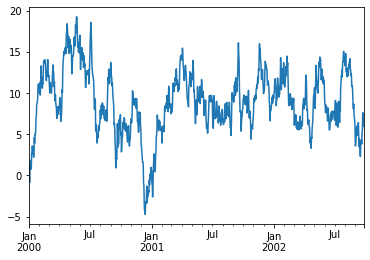

In [14]:
ts.plot()

On DataFrame, plot() is a convenience to plot all of the columns with labels:

In [15]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

In [16]:
df = df.cumsum()

<Figure size 432x288 with 0 Axes>

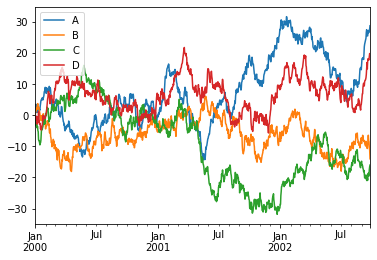

In [17]:
plt.figure(); df.plot(); plt.legend(loc='best')

## Getting Data In/Out

### CSV
[Writing to a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)

In [ ]:
df.to_csv('foo.csv')

[Reading from a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table)

In [ ]:
pd.read_csv('foo.csv')

#### Reading large CSV files

In [ ]:
iterator = pd.read_csv('foo.csv', iterator=True, chunksize=3)
iterator

In [ ]:
iterator.get_chunk()

### HDF5
Reading and writing to [HDFStores](http://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5)

Writing to a HDF5 Store

In [ ]:
df.to_hdf('foo.h5','df')

Reading from a HDF5 Store

In [ ]:
pd.read_hdf('foo.h5','df')

### Excel

Reading and writing to [MS Excel](http://pandas.pydata.org/pandas-docs/stable/io.html#io-excel)

Writing to an excel file

In [ ]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

Reading from an excel file

In [ ]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

### Gotchas
If you are trying an operation and you see an exception like:

In [ ]:
if pd.Series([False, True, False]):
    print("I was true")

See [Comparisons](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-compare) for an explanation and what to do.

See [Gotchas](http://pandas.pydata.org/pandas-docs/stable/gotchas.html#gotchas) as well.